In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi

pokemon = pd.read_csv("pokemon.csv")

1. Type별 pokemon의 종류

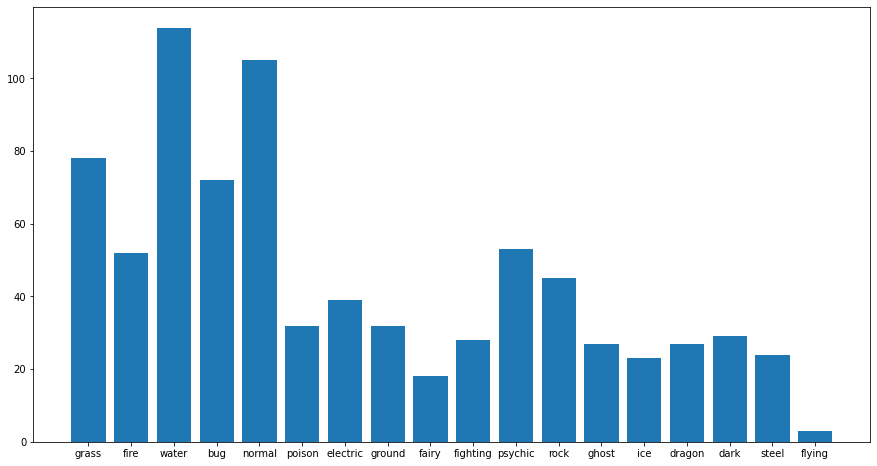

In [21]:
pokemon_type1 = pokemon.loc[:, 'type1']
type_unique = pokemon_type1.drop_duplicates()
pokemon_typevlaues = pokemon['type1'].value_counts(sort = False)
list(pokemon_typevlaues)

x = np.arange(len(list(pokemon_typevlaues)))

fig, ax = plt.subplots(1,1, figsize=(15,8))
plt.bar(x, list(pokemon_typevlaues))
plt.xticks(x, list(type_unique))

plt.show()

2. unique type

In [22]:
pokemon_alltype = pokemon.loc[:, 'type1':'type2']

print("There are", len(pokemon_alltype.drop_duplicates()), "unique pokemons out of", len(pokemon), end = ".")

There are 166 unique pokemons out of 801.

3. box plot

In [23]:
pokemon_AD = pokemon.loc[:, 'attack':'defense']
pokemon_AD = pokemon_AD.drop(['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication'], axis = 'columns')
pokemon_ADtype = pd.concat([pokemon_AD, pokemon_type1], 1)

C:\Users\KIMBEO~1.DES\AppData\Local\Temp/ipykernel_7280/3822898804.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  pokemon_ADtype = pd.concat([pokemon_AD, pokemon_type1], 1)


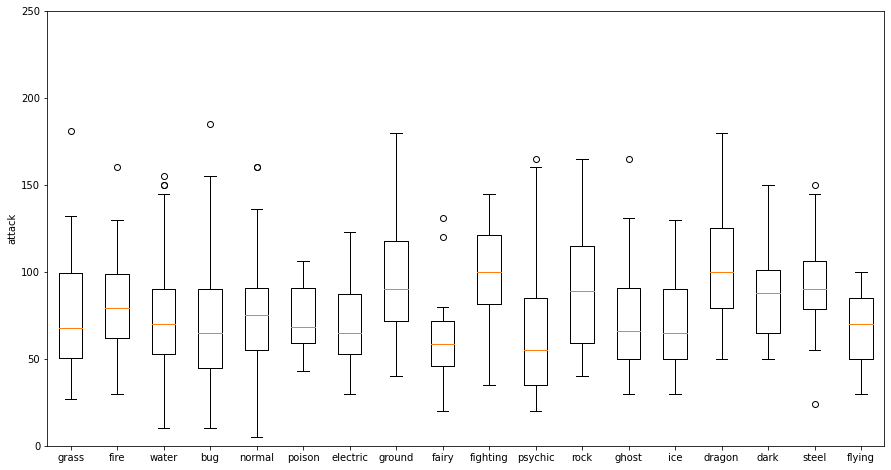

In [24]:
a = pokemon_ADtype.groupby("type1").get_group("grass").loc[:, 'attack']
b = pokemon_ADtype.groupby("type1").get_group("fire").loc[:, 'attack']
c = pokemon_ADtype.groupby("type1").get_group("water").loc[:, 'attack']
d = pokemon_ADtype.groupby("type1").get_group("bug").loc[:, 'attack']
e = pokemon_ADtype.groupby("type1").get_group("normal").loc[:, 'attack']
f = pokemon_ADtype.groupby("type1").get_group("poison").loc[:, 'attack']
g = pokemon_ADtype.groupby("type1").get_group("electric").loc[:, 'attack']
h = pokemon_ADtype.groupby("type1").get_group("ground").loc[:, 'attack']
i = pokemon_ADtype.groupby("type1").get_group("fairy").loc[:, 'attack']
j = pokemon_ADtype.groupby("type1").get_group("fighting").loc[:, 'attack']
k = pokemon_ADtype.groupby("type1").get_group("psychic").loc[:, 'attack']
l = pokemon_ADtype.groupby("type1").get_group("rock").loc[:, 'attack']
m = pokemon_ADtype.groupby("type1").get_group("ghost").loc[:, 'attack']
n = pokemon_ADtype.groupby("type1").get_group("ice").loc[:, 'attack']
o = pokemon_ADtype.groupby("type1").get_group("dragon").loc[:, 'attack']
p = pokemon_ADtype.groupby("type1").get_group("dark").loc[:, 'attack']
q = pokemon_ADtype.groupby("type1").get_group("steel").loc[:, 'attack']
r = pokemon_ADtype.groupby("type1").get_group("flying").loc[:, 'attack']

fig, ax = plt.subplots(1,1, figsize=(15,8))

plt.boxplot([a, b, c, d,e,f,g,h,i,j,k,l,m,n,o,p,q,r])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], list(type_unique))

plt.ylabel('attack')
plt.ylim(0, 250)

plt.show()

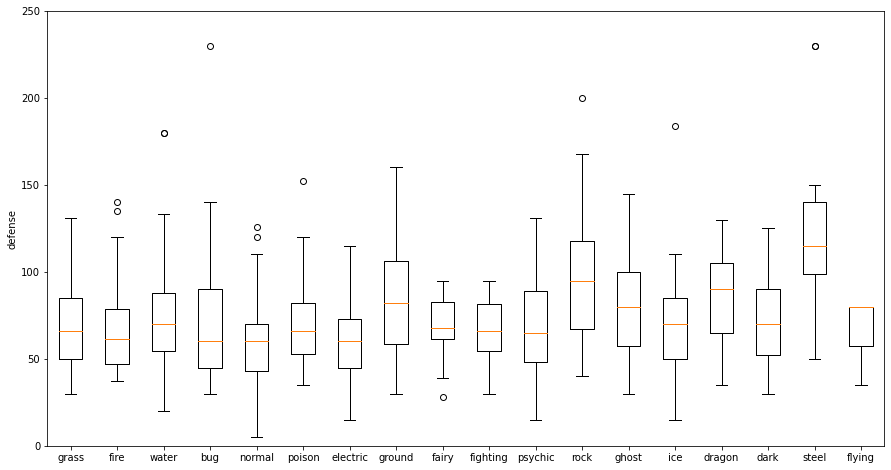

In [25]:
a1 = pokemon_ADtype.groupby("type1").get_group("grass").loc[:, 'defense']
b1 = pokemon_ADtype.groupby("type1").get_group("fire").loc[:, 'defense']
c1 = pokemon_ADtype.groupby("type1").get_group("water").loc[:, 'defense']
d1 = pokemon_ADtype.groupby("type1").get_group("bug").loc[:, 'defense']
e1 = pokemon_ADtype.groupby("type1").get_group("normal").loc[:, 'defense']
f1 = pokemon_ADtype.groupby("type1").get_group("poison").loc[:, 'defense']
g1 = pokemon_ADtype.groupby("type1").get_group("electric").loc[:, 'defense']
h1 = pokemon_ADtype.groupby("type1").get_group("ground").loc[:, 'defense']
i1 = pokemon_ADtype.groupby("type1").get_group("fairy").loc[:, 'defense']
j1 = pokemon_ADtype.groupby("type1").get_group("fighting").loc[:, 'defense']
k1 = pokemon_ADtype.groupby("type1").get_group("psychic").loc[:, 'defense']
l1 = pokemon_ADtype.groupby("type1").get_group("rock").loc[:, 'defense']
m1 = pokemon_ADtype.groupby("type1").get_group("ghost").loc[:, 'defense']
n1 = pokemon_ADtype.groupby("type1").get_group("ice").loc[:, 'defense']
o1 = pokemon_ADtype.groupby("type1").get_group("dragon").loc[:, 'defense']
p1 = pokemon_ADtype.groupby("type1").get_group("dark").loc[:, 'defense']
q1 = pokemon_ADtype.groupby("type1").get_group("steel").loc[:, 'defense']
r1 = pokemon_ADtype.groupby("type1").get_group("flying").loc[:, 'defense']

fig, ax = plt.subplots(1,1, figsize=(15,8))

plt.boxplot([a1, b1, c1, d1,e1,f1,g1,h1,i1,j1,k1,l1,m1,n1,o1,p1,q1,r1])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], list(type_unique))

plt.ylabel('defense')
plt.ylim(0, 250)

plt.show()

4. Efficiency Frontier

In [26]:
WN = pokemon_ADtype[(pokemon_ADtype["type1"] == 'water') | (pokemon_ADtype["type1"] == 'normal')]

In [27]:
def is_efficient(row, att, defen):
    x = row.loc[att]
    y = row.loc[defen]
    
    max_att = WN.loc[WN[defen]==y].max()[att] <= x
    max_def = WN.loc[WN[att]==x].max()[defen] <= y
    is_double = len(WN.loc[(WN[att]>x) & (WN[defen]>y)])==0
    
    return max_att and max_def and is_double

In [28]:
eff = pd.DataFrame()
for x in list(WN.index):
    tmp = is_efficient(WN.loc[x], 'attack', 'defense')
    if tmp == True:
        eff = eff.append(WN.loc[x])
Index = eff.index
eff

,attack,defense,type1
90,95.0,180.0,water
485,160.0,110.0,normal
564,108.0,133.0,water
745,140.0,130.0,water


In [29]:
pokeff = pd.DataFrame()
for x in list(Index):
    pokeff = pokeff.append(pokemon.iloc[x])
print("efficiency frontier pokemons :", list(pokeff.loc[:, 'name']))

efficiency frontier pokemons : ['Cloyster', 'Regigigas', 'Carracosta', 'Wishiwashi']


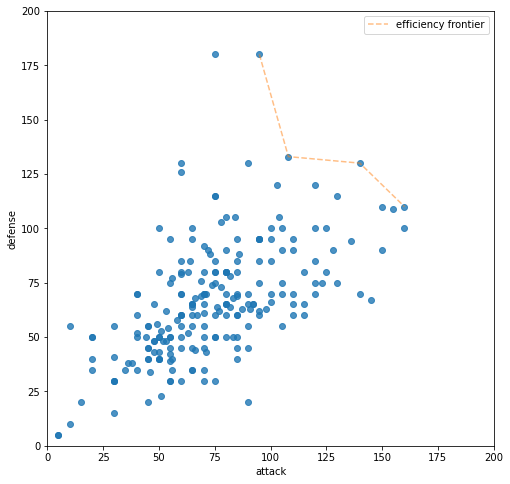

In [30]:
eff = eff.sort_values('attack', ascending = 'False')

fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.regplot(x='attack', y='defense', data=WN, fit_reg=False, ax=ax)

plt.plot(eff['attack'], eff['defense'], '--', label='efficiency frontier', alpha=0.5)
plt.xlim([0,200])
plt.ylim([0,200])
plt.legend(loc='best')

plt.show()

5. Radar chart

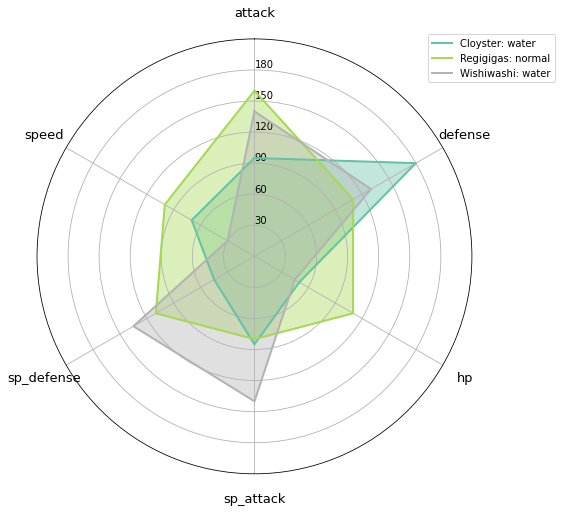

In [31]:
radar_val = pokeff.loc[:, 'attack':'speed']
radar_val = radar_val.drop(['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication'], axis = 'columns')
radar_val = radar_val.drop(['experience_growth', 'height_m', 'japanese_name', 'name', 'percentage_male', 'pokedex_number'], axis = 'columns')

radar_drop = radar_val.drop([564])
pokeff_drop = pokeff.drop([564])

labels = radar_drop.columns
label_num = len(labels)

angles = [x / float(label_num) * (pi * 2) for x in range(label_num)]
angles += angles[:1]

col = plt.cm.get_cmap("Set2", len(radar_drop.index))
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)

w = 0
for i, row in radar_drop.iterrows():
    color = col(w**2)
    data = radar_drop.loc[i].tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], labels, fontsize=13)
    ax.tick_params(axis='x', which='major', pad=15)
    ax.set_rlabel_position(0)
    
    plt.yticks([30,60,90,120,150,180],['30','60','90','120','150','180'], fontsize=10)
    plt.ylim(0,210)
            
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=list(pokeff_drop.loc[:, 'name'])[w] + ": " + list(pokeff_drop.loc[:, 'type1'])[w])
    ax.fill(angles, data, color=color, alpha=0.4)
    w += 1

plt.legend(loc=(0.9,0.9))
plt.show()